# Daily Expenses Analysis
 In this project, I will be cleaning the data of my daily expenses as well as manipulating the data for specific purposes.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## File Reading

In [2]:
df = pd.read_csv('dailyexpenses.csv')

## Data Cleaning

In [3]:
# Check for missing data
print(df.isnull().sum())

Item        2
Date        0
Amount      1
Category    0
dtype: int64


In [4]:
# Show only the rows where 'Item' is missing
missing_rows1 = df[df['Item'].isnull()]
print(missing_rows1)

   Item        Date  Amount  Category
21  NaN  12/01/2026     7.5      Food
38  NaN  20/01/2026    12.0  Shopping


In [5]:
# Show only the rows where 'Amount' is missing
missing_rows2 = df[df['Amount'].isnull()]
print(missing_rows2)

        Item        Date  Amount   Category
49  Notebook  26/01/2026     NaN  Education


In [6]:
# Handle missing data
# Compute median of 'Education' items' amount
edu_median = df.loc[df['Category'] == 'Education', 'Amount'].median()

# Fill in missing values
# I found 2 missing values in Item and filled them as Unknown, 1 missing value in Amount (Education category) and filled it as the median of Education items' amount
new_df = df.fillna({
    'Item' : 'Unknown','Amount' : edu_median
})

# Display dataframe after handling missing values
print(new_df)

                        Item        Date  Amount       Category
0     Nasi Lemak + Teh O Ais  01/01/2026     8.5           Food
1             RapidKL Reload  01/01/2026    30.0      Transport
2               Grab to mall  02/01/2026    12.0      Transport
3        Chicken Rice (Cafe)  02/01/2026     9.0           Food
4                 Stationery  03/01/2026    15.4      Education
5      Indomie + Egg (Mamak)  03/01/2026     7.0           Food
6       Netflix Subscription  04/01/2026    55.0  Entertainment
7        Shopee - Phone Case  04/01/2026    12.5       Shopping
8   Iced Pistachio Chocolate  05/01/2026    14.0           Food
9        Printing Lab Report  05/01/2026     5.0      Education
10      Nasi Campur (Lauk 2)  06/01/2026    10.0           Food
11                  Gym Pass  06/01/2026    10.0         Health
12                  Bus Fare  07/01/2026     1.0      Transport
13                 Maggi Cup  07/01/2026     2.5           Food
14                ZUS Coffee  08/01/2026

## Summary Statistics

In [7]:
# View descriptive statistics of dataset
new_df.describe()

,Amount
count,50.000000
mean,15.464000
std,13.205932
min,1.000000
25%,7.125000
50%,11.250000
75%,17.500000
max,55.000000


In [20]:
# Total amount spent
print('Total amount spent:', new_df['Amount'].sum())

# Most frequent category
print('Most frequent category:', new_df['Category'].mode()[0])

Total amount spent: 773.2
Most frequent category: Food


## Data Visualisation

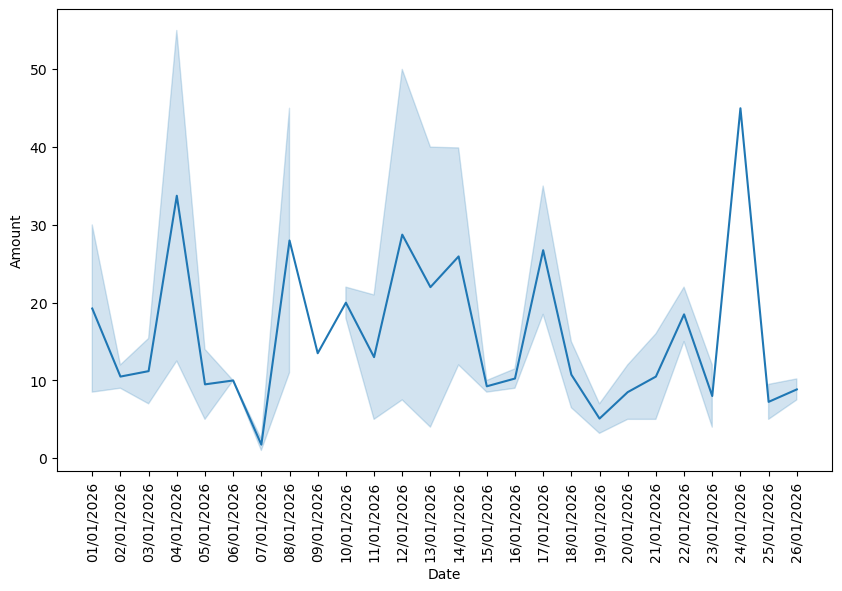

In [10]:
# Spending trend (line plot)

# Make the chart wider
plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Amount', data=new_df)

# Rotate x-axis labels
plt.xticks(rotation=90) 

plt.show()

**Insight:**
 The lowest point is on 07/01/2026.
The highest peak in the average spending line occurred on 23/01/2026.
The day that had the widest range of different expense amounts is 04/01/2026 as it has the largest Confidence Interval.

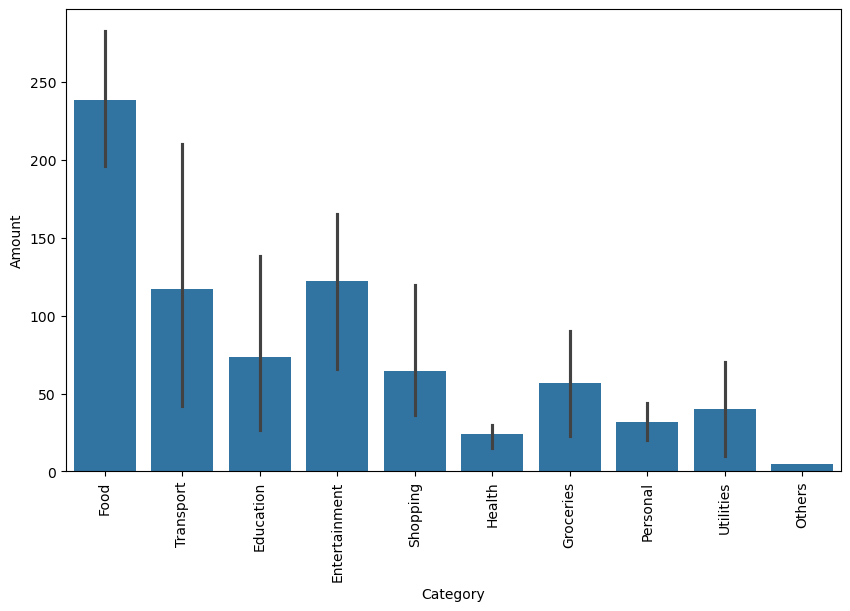

In [16]:
# Category breakdown (bar chart)

# Make the chart wider
plt.figure(figsize=(10, 6)) 

sns.barplot(x='Category', y='Amount', data=new_df, estimator=sum)
# If no estimator=sum, it will show the mean amount of each category by default

# Rotate x-axis labels
plt.xticks(rotation=90) 

plt.show()

<Axes: xlabel='Amount', ylabel='Count'>

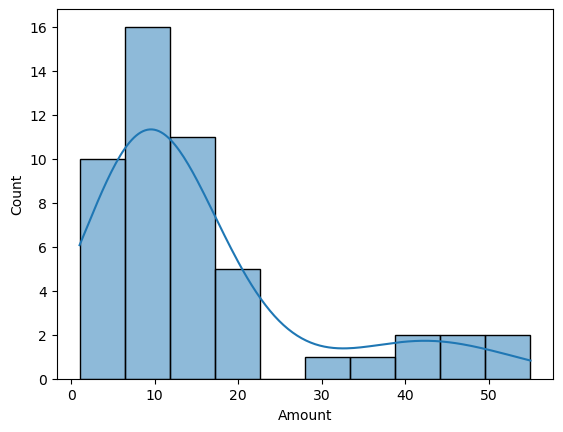

In [23]:
# Distribution of expenses (histogram)
sns.histplot(new_df['Amount'], kde=True) 
# kde=True is for the line in the graph

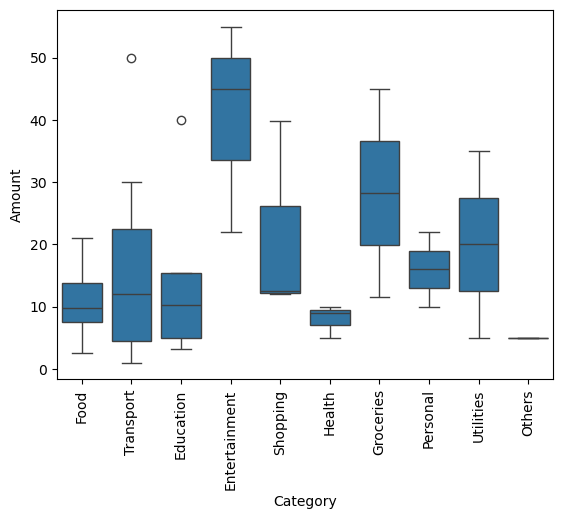

In [28]:
# Finding outliers (box plot)
sns.boxplot(x='Category', y='Amount', data=new_df)
plt.xticks(rotation=90)

plt.show()

## Deep Dive Analysis

In [29]:
# 1. Which specific item is responsible for the highest spending peak?
new_df.sort_values('Amount', ascending=False).head(1)

,Item,Date,Amount,Category
6,Netflix Subscription,04/01/2026,55.0,Entertainment


In [53]:
# 2. a) What are the average and the most expensive "Food" item?

food_summary = new_df[new_df['Category']=='Food'].agg({'Amount': ['mean', 'max']})

print('The average and the most expensive Food item:', food_summary)

# b) What is the difference between the average and the most expensive "Food" item?

diff = food_summary.loc['max', 'Amount'] - food_summary.loc['mean', 'Amount']

print(f"The difference between the average and the most expensive Food item is {diff:.2f}")

The average and the most expensive Food item:          Amount
mean  10.840909
max   21.000000
The difference between the average and the most expensive Food item is 10.16


In [52]:
# 3. On which date did I spend the most on Transport?
print('I spent the most on Transport on:', new_df[new_df['Category']=='Transport'].groupby('Date')['Amount'].sum().idxmax())

I spent the most on Transport on: 12/01/2026


count     5.000000
mean     14.760000
std      14.892548
min       3.200000
25%       5.000000
50%      10.200000
75%      15.400000
max      40.000000
Name: Amount, dtype: float64


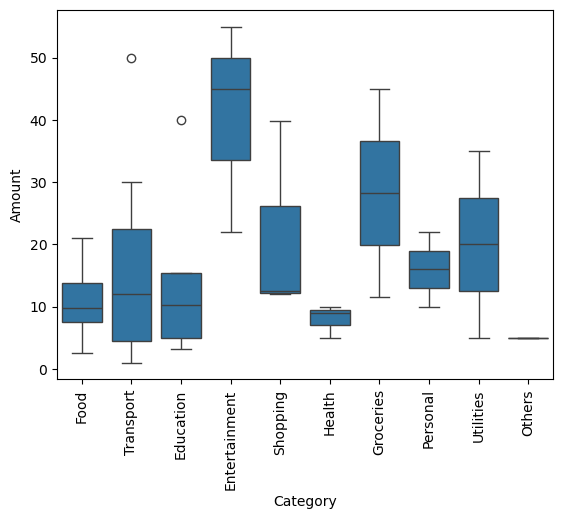

In [51]:
# 4. Is spending on Education consistent or driven by outliers?
print(new_df[new_df['Category'] == 'Education']['Amount'].describe())

# box plot for clearer view
sns.boxplot(x='Category', y='Amount', data=new_df)
plt.xticks(rotation=90)

plt.show()

The standard deviation for Education (14.89) is high because it is slightly greater than the mean (14.76). This indicates that spending is not consistent and is heavily influenced by the outlier of 40.00, while most other expenses remain below 16.00.

In [56]:
# 5. Which category has the highest transaction frequency versus total cost?

category_comp = new_df.groupby('Category')['Amount'].agg(['count', 'sum'])
print(category_comp)

highest_freq = category_comp['count'].idxmax()
freq_value = category_comp['count'].max()

highest_total = category_comp['sum'].idxmax()
total_value = category_comp['sum'].max()

print(f"Highest transaction frequency: {highest_freq} ({freq_value} times)")
print(f"Highest total cost: {highest_total} (RM{total_value:.2f})")

               count    sum
Category                   
Education          5   73.8
Entertainment      3  122.0
Food              22  238.5
Groceries          2   56.5
Health             3   24.0
Others             1    5.0
Personal           2   32.0
Shopping           3   64.4
Transport          7  117.0
Utilities          2   40.0
Highest transaction frequency: Food (22 times)
Highest total cost: Food (RM238.50)


## Final Conclusion

The analysis of the January 2026 expense data reveals several key insights into my spending habits:

**i )Daily Routine vs. One-off Expenses:** While the Netflix Subscription (RM 55.00) was the highest single transaction, the Food category had the most significant impact on the overall budget, accounting for the highest frequency (22 times) and the highest total cost (RM 238.50).

**ii) Volatility in Education:** The Education category showed the most inconsistency (std of 14.89 vs mean of 14.76). This confirms that academic spending is driven by irregular, high-cost events (like the RM 40.00 purchase) rather than a steady daily cost.

**iii) Data Integrity:** Through the cleaning process, specifically the imputation of the missing Education amount using the category median, the dataset was made more robust, ensuring that the final RM 773.20 total spend is an accurate reflection of the month.

**Next Steps:** Based on these findings, future budgeting efforts should focus on managing the "frequency" of food expenses to lower the total monthly cost, as these small daily transactions accumulate more significantly than isolated large purchases.